In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA

### Data Load
- 'PL04496-03040' (prod_list[0]) 제품만을 대상으로
- 정상 데이터만으로 학습
- 전체 데이터로 테스트

In [42]:
isee_machine[isee_machine.combined_label==3][['K_mahala_label', 'mahala_label','lof_label','gmm_label','IF_label','svm_label']].groupby(['K_mahala_label', 'mahala_label','svm_label','gmm_label','IF_label']).count()

lof_label
K_mahala_label mahala_label svm_label gmm_label IF_label           
0              0            1         1         1               434
               1            1         0         1                40
                                      1         0               168
1              0            0         1         1               108
                            1         0         1               241
                                      1         0                36
               1            1         0         0               306

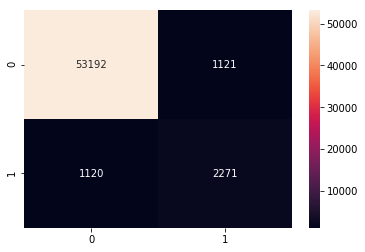

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sn

### plot confusion matrix
label = 'IF_label'
df_cm = pd.DataFrame(confusion_matrix(isee_machine[label], isee_machine['K_mahala_label']))
plt.figure()
sn.heatmap(df_cm, annot=True, fmt='d')

In [193]:
isee_machine = pd.read_csv('./data/isee_machine_middle_NG_inter_MapNorm_combined_label.csv')
prod_list = isee_machine.ProductNum.unique()

# prod_list[0] 제품에 대해서만 분석
isee_machine = isee_machine[isee_machine.ProductNum == prod_list[0]]    

analy_col = ['CycleTime', 'VpPosition', 'VpTime',
        'VpPressure', 'MaxInjectionPressure', 'InjectionEndPosition',
        'PlasticizingTime', 'PlasticsEndPosotion', 'ClampingTime',
        'MouldOpeningTime', 'HotOilContoller', 'TankTemp', 'NozzleTemp',
        'Zone1', 'Zone2', 'Zone3', 'Zone4'] 
isee_machine['NG_Label'] = isee_machine['NG'] + isee_machine['NG5']

"""# combined_label== 1인것을 정상으로 편입, 하나씩 낮춰줌
isee_machine['combined_label'] = [x-1 if x>1 else x for x in isee_machine['combined_label']] 
# 원래 combined_label== 3,4,5 인 것을 위험군으로 합침
isee_machine['combined_label'] = [2 if x>=2 else x for x in isee_machine['combined_label']]"""

# combined_label에서 lof_label 빼고, svm_label 넣기
isee_machine['combined_label'] = isee_machine['K_mahala_label'] + isee_machine['mahala_label'] + isee_machine['gmm_label'] +isee_machine['IF_label']

# 원래 combined_label== 1,2,3,4,5 인 것을 위험군으로 합침
isee_machine['combined_label'] = [1 if x>=3 else 0 for x in isee_machine['combined_label']]

# # 원래 combined_label== 1,2,3,4,5 인 것을 위험군으로 합침
# isee_machine['combined_label'] = [3 if x>=3 else x for x in isee_machine['combined_label']]

In [194]:
isee_machine.groupby('combined_label')[analy_col].describe().T

combined_label               0            1
CycleTime  count  55282.000000  2422.000000
           mean      36.645707    57.793825
           std        3.084285    64.568800
           min       20.685000     0.090000
           25%       34.800000    31.790000
           50%       37.295833    32.890000
           75%       38.470000    49.687802
           max      174.560000   476.740000
VpPosition count  55282.000000  2422.000000
           mean      25.302154    29.431176
           std        3.250856     8.871187
           min       20.000000     0.000000
           25%       24.000000    23.000000
           50%       25.000000    25.000000
           75%       25.000000    36.500000
           max       42.000000    76.813793
VpTime     count  55282.000000  2422.000000
           mean       3.177273     2.770529
           std        0.344623     0.668485
           min        2.110000     0.010000
           25%        2.955000     2.265000
           50%        3.170000     2.650000
           75%        3.345000     3.180000
           max        8.000000     8.500000
VpPressure count  55282.000000  2422.000000
           mean      57.308490    67.109811
           std       15.599325    19.755532
           min       27.000000     0.000000
           25%       49.000000    56.500000
           50%       58.000000    59.041667
...                        ...          ...
Zone1      std        5.334703     6.632675
           min      267.500000   270.333333
           25%      281.000000   280.000000
           50%      290.000000   289.714286
           75%      290.500000   294.500000
           max      309.000000   316.500000
Zone2      count  55282.000000  2422.000000
           mean     283.683666   283.895969
           std        6.410522     8.812847
           min      273.000000   270.000000
           25%      280.000000   276.000000
           50%      280.000000   280.000000
           75%      285.000000   295.000000
           max      310.000000   316.500000
Zone3      count  55282.000000  2422.000000
           mean     274.199721   274.729528
           std        3.781535     4.391596
           min      266.000000   266.500000
           25%      270.000000   270.000000
           50%      275.000000   275.074176
           75%      275.000000   280.000000
           max      282.000000   282.000000
Zone4      count  55282.000000  2422.000000
           mean     266.265257   265.887459
           std        5.656344     5.755633
           min      251.000000   255.000000
           25%      260.000000   260.291403
           50%      267.000000   266.000000
           75%      270.000000   270.000000
           max      314.000000   314.000000

[136 rows x 2 columns]

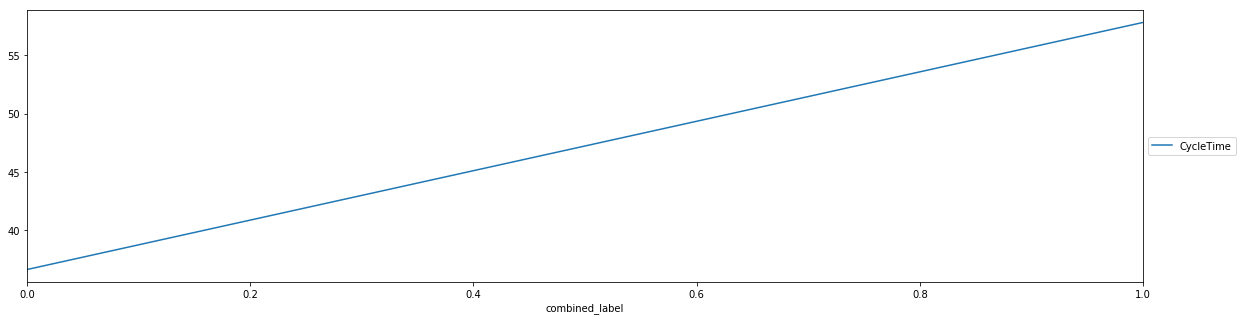

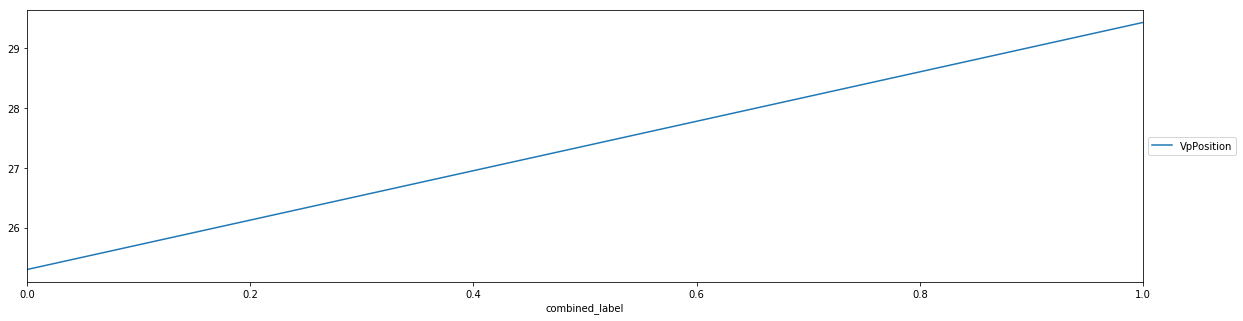

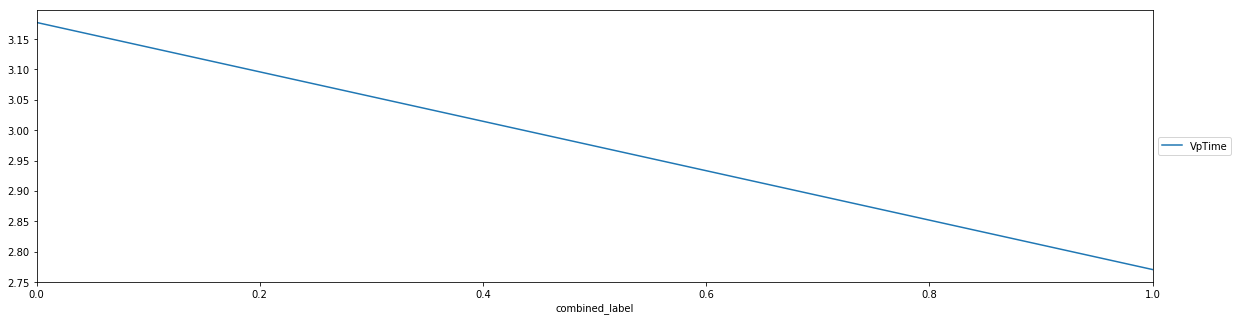

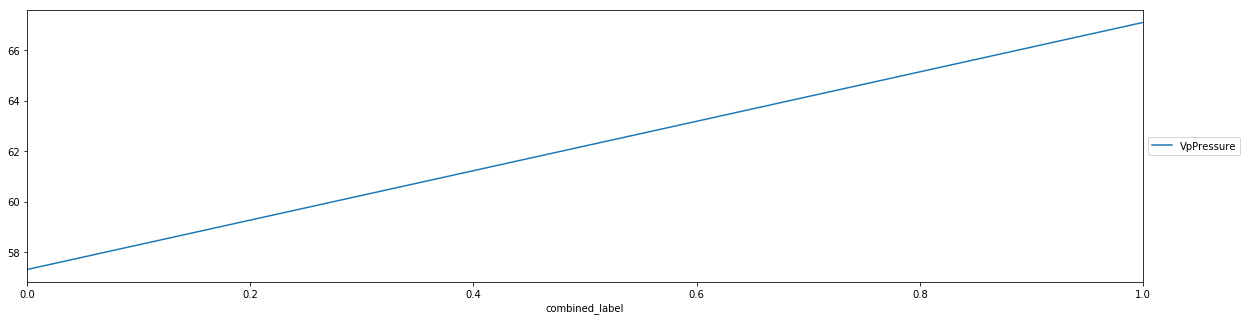

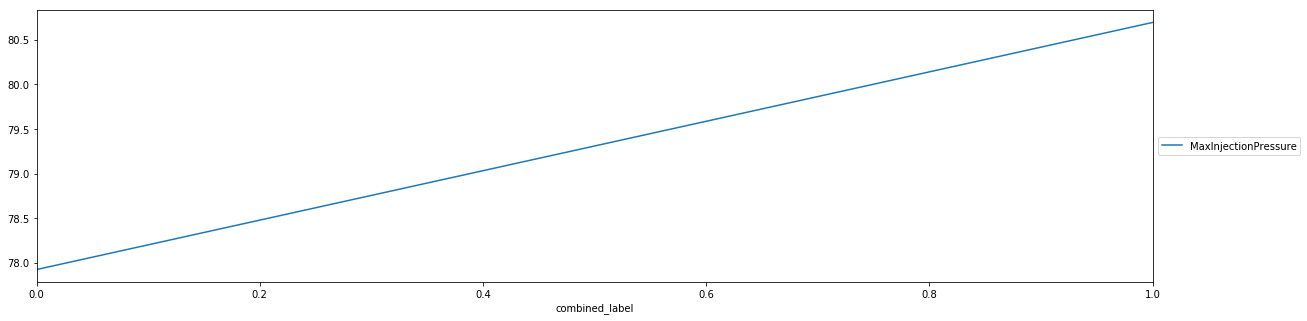

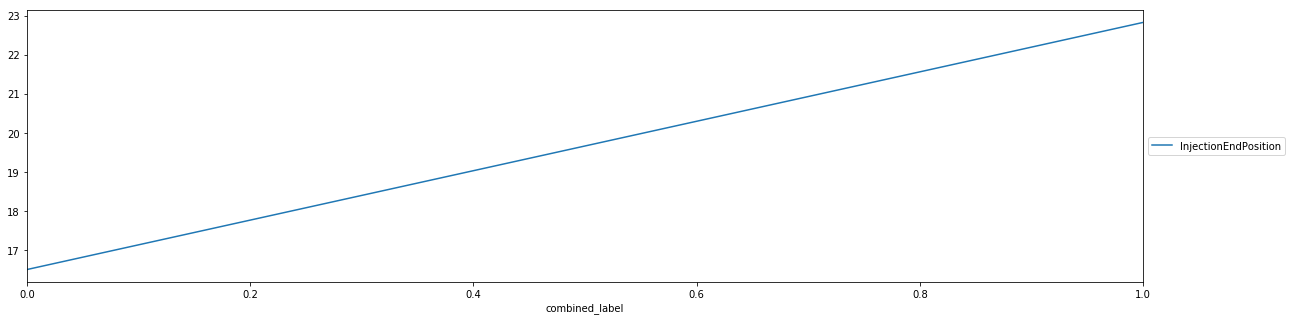

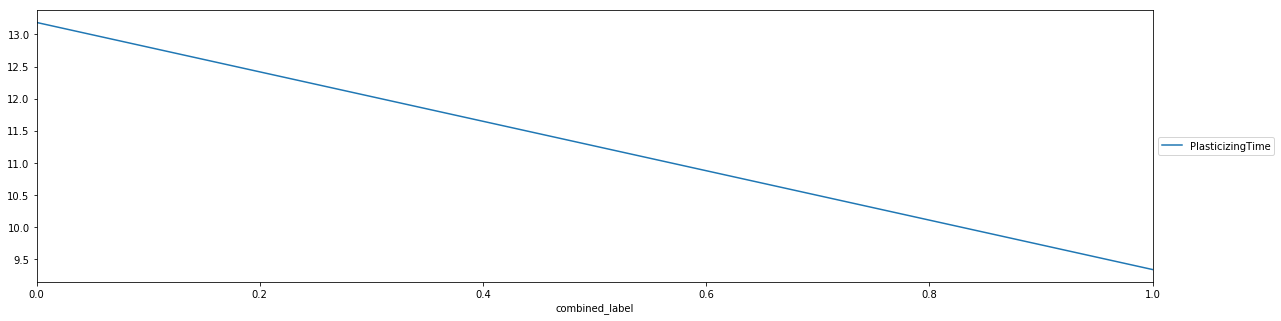

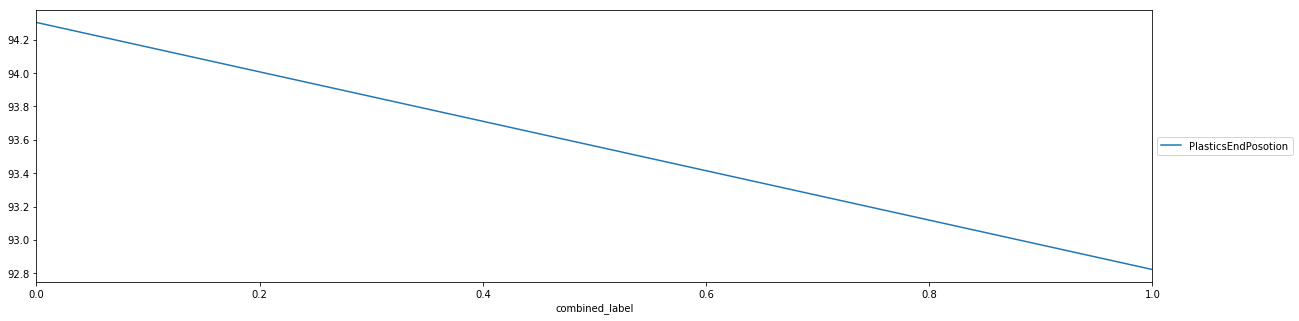

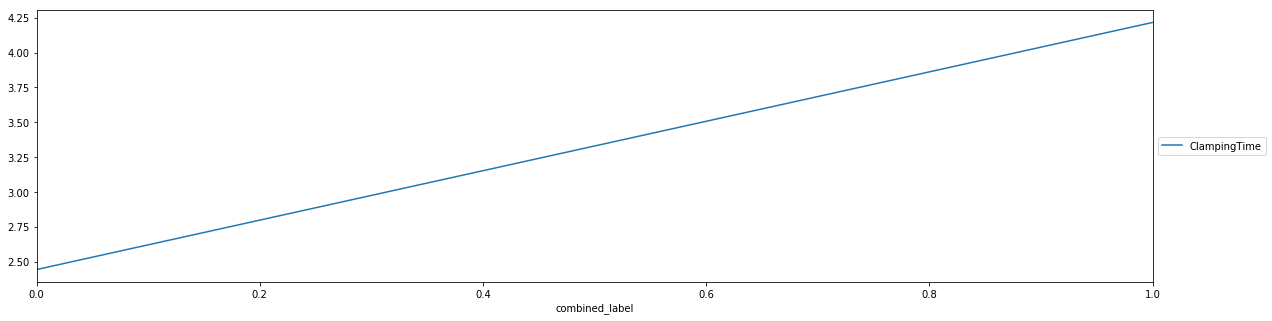

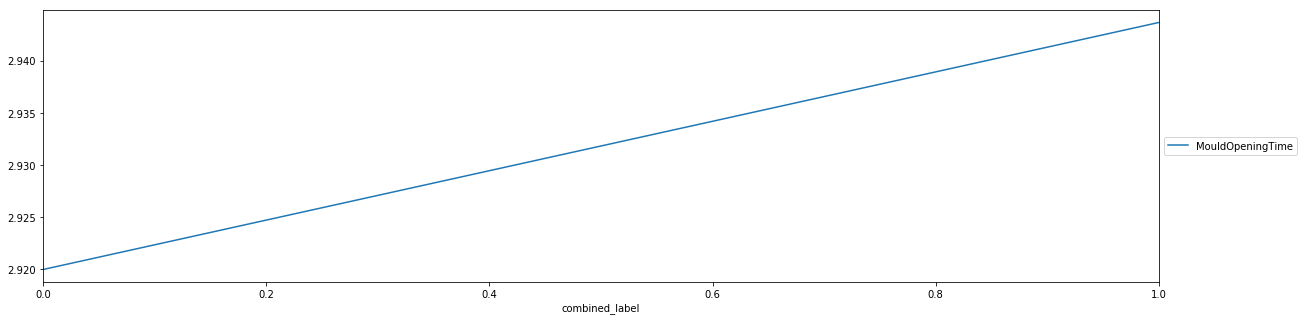

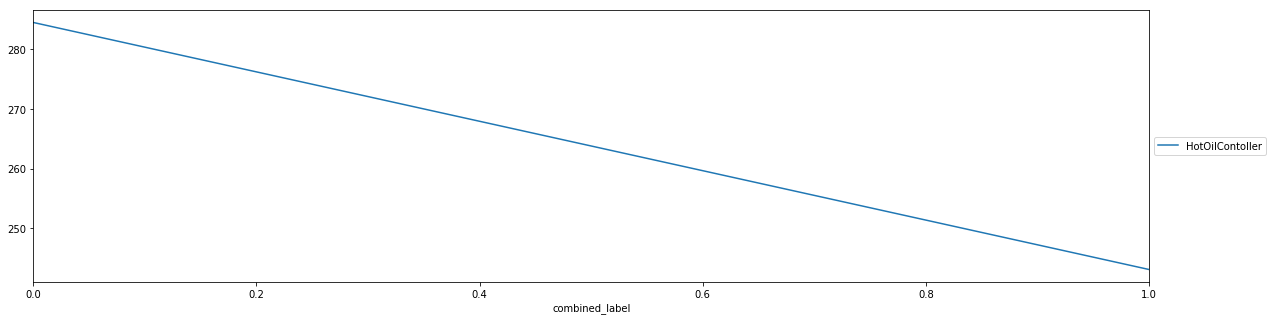

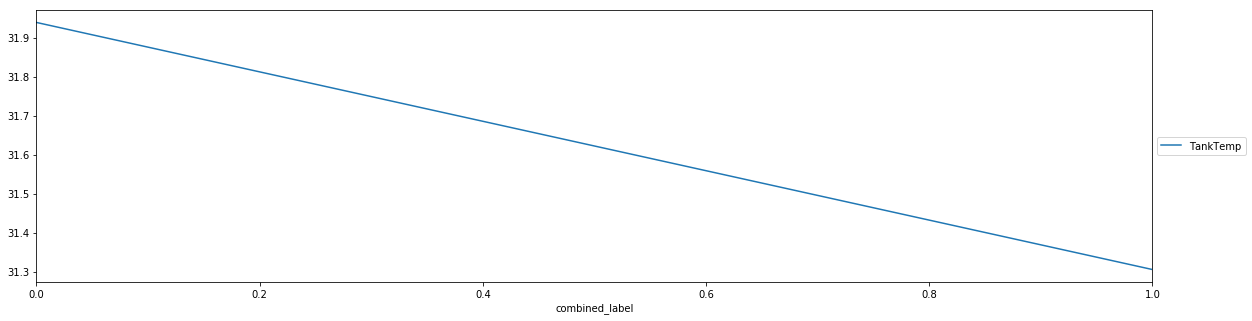

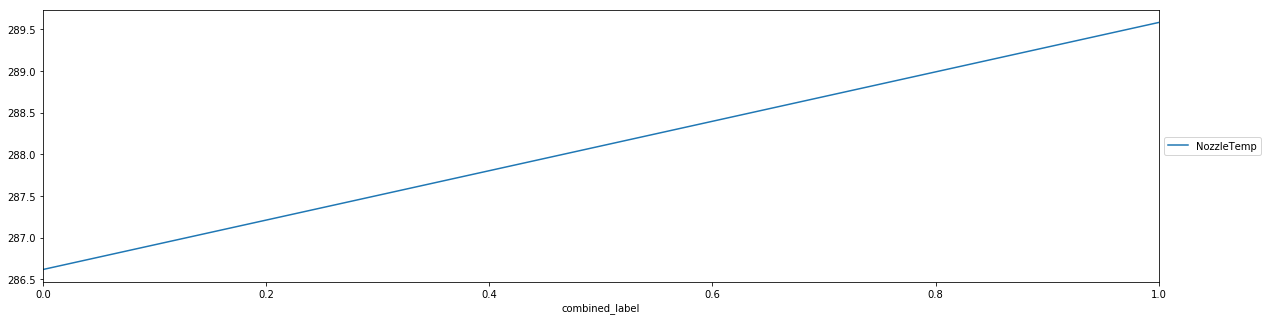

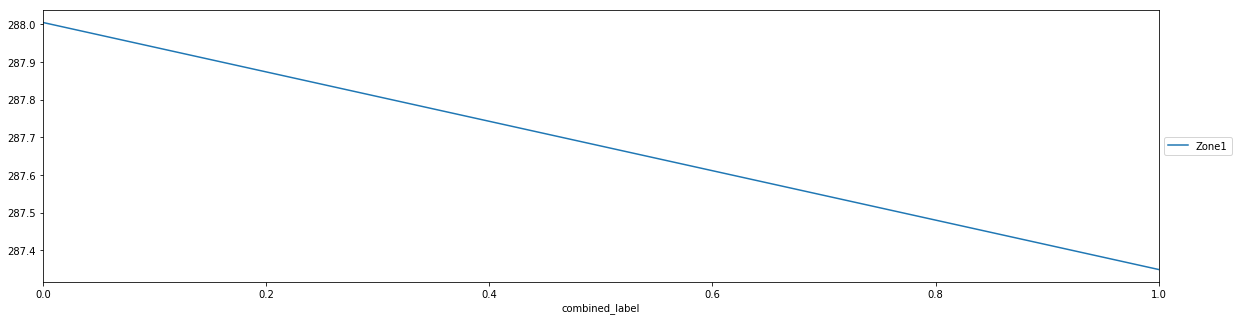

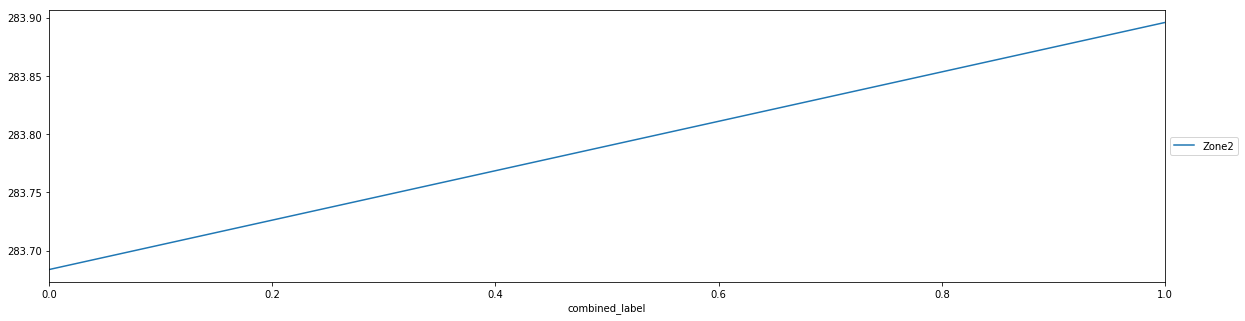

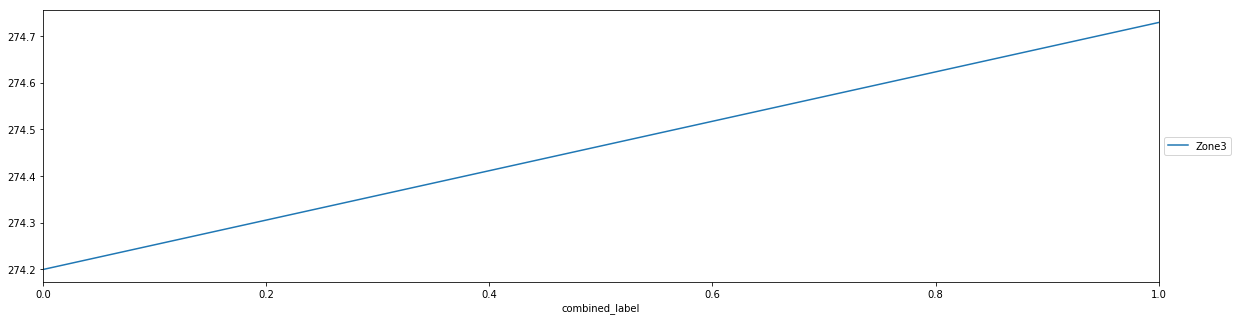

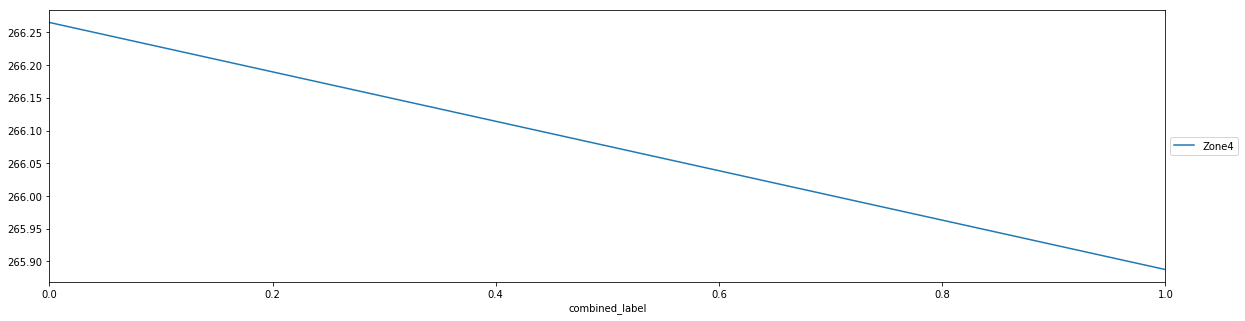

In [195]:
for i in range(len(analy_col)):
    isee_machine.groupby('combined_label')[analy_col[i]].mean().plot(figsize=(20,5))
    plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
    plt.show()

In [196]:
isee_machine_abnormal = isee_machine[isee_machine['combined_label'] != 0]
isee_machine_normal = isee_machine[isee_machine['combined_label'] == 0]

### Scaler

In [197]:
from sklearn.preprocessing import RobustScaler

In [198]:
# Initialize a scaler using the training data.
scaler = RobustScaler().fit(isee_machine_normal[analy_col])
isee_machine[analy_col] = scaler.transform(isee_machine[analy_col])

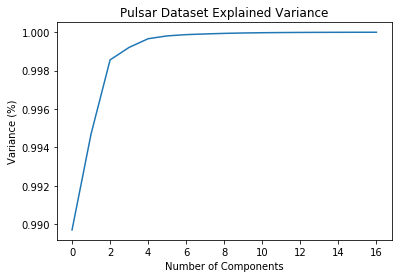

In [199]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(isee_machine[analy_col])
#Plotting the Cumulative Summation of the Explained Variance
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.show()

### PCA

In [200]:
pca = PCA(n_components=3)
X = pca.fit_transform(isee_machine[analy_col])
isee_machine = pd.concat([isee_machine[['CycleNum','NG', 'combined_label', 'K_mahala_label', 'mahala_label', 'lof_label',
       'gmm_label', 'IF_label', 'svm_label']],pd.DataFrame(X, columns=['x','y','z'])], axis=1)
print(pca.explained_variance_ratio_.sum()) 

0.998558051325639


In [201]:
pd.DataFrame(X)[0].min(), pd.DataFrame(X)[0].mean(), pd.DataFrame(X)[0].max()

(-96.24858036531933, -1.9701725655347294e-16, 10875.43511000186)

In [202]:
pd.DataFrame(X)[0].median()

-7.709584475933905

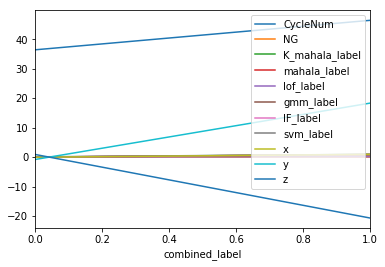

In [203]:
isee_machine.groupby('combined_label').mean().plot()

In [204]:
isee_machine.groupby('combined_label').describe().T

combined_label                   0            1
CycleNum       count  55282.000000  2422.000000
               mean      36.447361    46.454170
               std       21.736076    17.520371
               min        1.000000     1.000000
               25%       11.000000    40.000000
               50%       34.000000    54.000000
               75%       51.000000    56.000000
               max       70.000000    69.000000
NG             count  55282.000000  2422.000000
               mean       0.059712     0.037159
               std        0.236955     0.189191
               min        0.000000     0.000000
               25%        0.000000     0.000000
               50%        0.000000     0.000000
               75%        0.000000     0.000000
               max        1.000000     1.000000
K_mahala_label count  55282.000000  2422.000000
               mean       0.019862     0.947151
               std        0.139527     0.223778
               min        0.000000     0.000000
               25%        0.000000     1.000000
               50%        0.000000     1.000000
               75%        0.000000     1.000000
               max        1.000000     1.000000
mahala_label   count  55282.000000  2422.000000
               mean       0.023859     0.855904
               std        0.152613     0.351259
               min        0.000000     0.000000
               25%        0.000000     1.000000
               50%        0.000000     1.000000
...                            ...          ...
svm_label      std        0.295681     0.206447
               min        0.000000     0.000000
               25%        0.000000     1.000000
               50%        0.000000     1.000000
               75%        0.000000     1.000000
               max        1.000000     1.000000
x              count  55282.000000  2422.000000
               mean      -0.040507     0.924570
               std      157.236496    79.596363
               min       -9.366935   -96.248580
               25%       -7.713758    -7.644423
               50%       -7.709881    -7.353302
               75%       -6.715082    -6.352590
               max    10875.435110  1872.043182
y              count  55282.000000  2422.000000
               mean      -0.803418    18.337960
               std        2.538710    48.866467
               min       -7.831068    -3.776147
               25%       -1.302259     1.836222
               50%       -0.937408     3.736086
               75%       -0.510051    22.658582
               max      380.370269   913.211056
z              count  55282.000000  2422.000000
               mean       0.905916   -20.677485
               std        1.851692    41.263327
               min      -96.196987  -158.779121
               25%        0.561747   -34.132716
               50%        1.181057    -2.438743
               75%        1.701300    -2.178657
               max      191.922871   459.080089

[88 rows x 2 columns]

In [205]:
isee_machine['NG'].sum()

3391

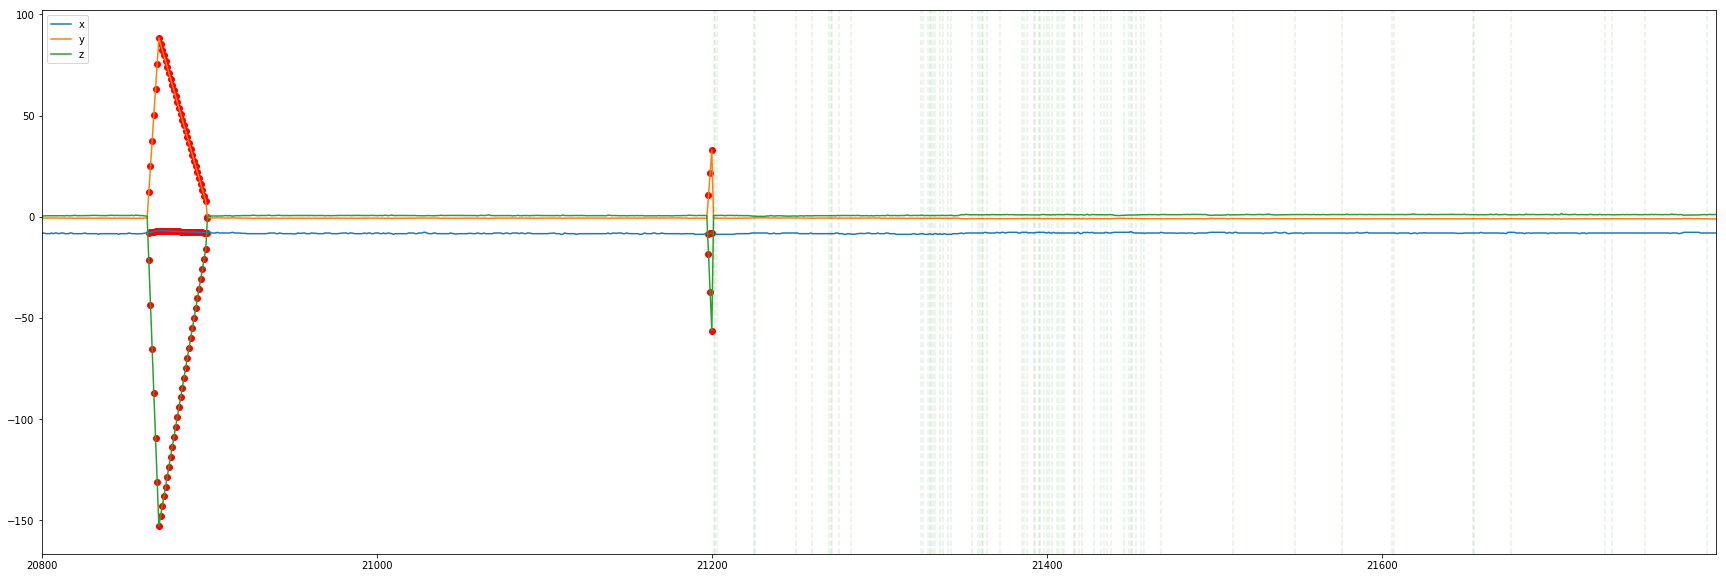

In [211]:
n = 20800
a = 1000
plot_df = isee_machine[n:n+a]
plot_df[['x','y','z']].plot(figsize=(30,10))

# for xc in plot_df[plot_df.combined_label==3].index.tolist():
#     plt.axvline(x=xc, color='yellow', linestyle='--', alpha=0.3)
# for xc in plot_df[plot_df.combined_label==4].index.tolist():
#     plt.axvline(x=xc, color='orange', linestyle='--', alpha=0.3)
#for xc in plot_df[plot_df.combined_label==1].index.tolist():
#    plt.axvline(x=xc, color='red', linestyle='--', alpha=0.5)

for xc in plot_df[plot_df.combined_label==1].index.tolist():
    plt.scatter(x=xc, y=plot_df.loc[xc]['y'], color='red')
for xc in plot_df[plot_df.combined_label==1].index.tolist():
    plt.scatter(x=xc, y=plot_df.loc[xc]['x'], color='red')
for xc in plot_df[plot_df.combined_label==1].index.tolist():
    plt.scatter(x=xc, y=plot_df.loc[xc]['z'], color='red')

    
for xc in plot_df[plot_df.NG==1].index.tolist():
    plt.axvline(x=xc, color='green', linestyle='--', alpha=0.1)

### Z transform

In [14]:
isee_machine_normal = isee_machine[isee_machine['combined_label'] == 0]

ms_dic = {}
ms_dic[0] = {"mean": isee_machine_normal[0].mean(), "std": isee_machine_normal[0].std()}
ms_dic[1] = {"mean": isee_machine_normal[1].mean(), "std": isee_machine_normal[1].std()}
ms_dic[2] = {"mean": isee_machine_normal[2].mean(), "std": isee_machine_normal[2].std()}

isee_machine[0] = (isee_machine[0] - ms_dic[0]['mean']) / ms_dic[0]['std']
isee_machine[1] = (isee_machine[1] - ms_dic[1]['mean']) / ms_dic[1]['std']
isee_machine[2] = (isee_machine[2] - ms_dic[2]['mean']) / ms_dic[2]['std']

In [15]:
for i in [0,1,2]:
    label = []
    for x in isee_machine[i]:
        if (1 * ms_dic[i]['std'] < np.abs(x)) and (np.abs(x) <= 2 * ms_dic[i]['std']):
            label.append(1)
        elif (2 * ms_dic[i]['std'] < np.abs(x)) and (np.abs(x) <= 3 * ms_dic[i]['std']):
            label.append(2)
        elif 3 * ms_dic[i]['std'] < np.abs(x):
            label.append(3)
        else: label.append(0)
    isee_machine['z_'+str(i)] = label
    
isee_machine['z_label'] = isee_machine["z_0"]+isee_machine["z_1"]+isee_machine["z_2"]
isee_machine = isee_machine.drop(['z_0','z_1','z_2'], axis=1)

In [16]:
isee_machine[isee_machine.z_label!=0].shape

(29017, 7)

In [17]:
isee_machine[isee_machine.z_label!=0].shape[0]/len(isee_machine)

0.5028594204907806

In [19]:
w=60    # window size
s=5     # stride
n= 30    # 몇분 이내 불량 cnt

label = []

target_label = 'z_label'

for c in isee_machine['CycleNum'].unique():
    df = isee_machine[isee_machine['CycleNum']==c]
    df = df.reset_index(drop=True)
    for i in range(int((len(df)-w)/s)):
        df.loc[s*i:s*i+w-1][0].plot(c='r')
        df.loc[s*i:s*i+w-1][1].plot(c='g')
        df.loc[s*i:s*i+w-1][2].plot(c='b')
        plt.gca().axes.get_xaxis().set_visible(False)
        temp = df.loc[s*i+n:s*i+w-1+n][target_label].sum()
        label.append(temp)        
        plt.savefig('./image/'+str(c)+'-'+str(i)+'p '+ str(temp) +'.png')
        plt.clf()

        df.loc[s*i+n:s*i+w-1+n]


print("저장 완료!!")

저장 완료!!


<Figure size 432x288 with 0 Axes>

In [20]:
isee_machine['z_label'].unique()

array([1, 2, 0, 6, 5, 4, 3, 9, 8, 7], dtype=int64)

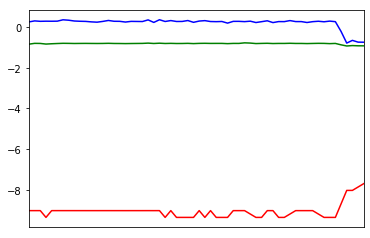

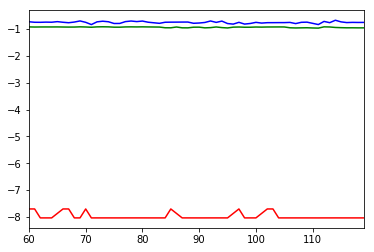

<Figure size 432x288 with 0 Axes>

In [27]:
isee_machine.loc[0:60-1][0].plot(c='r')
isee_machine.loc[0:60-1][1].plot(c='g')
isee_machine.loc[0:60-1][2].plot(c='b')
plt.gca().axes.get_xaxis().set_visible(False)
plt.show()
#plt.savefig('./image/'+'0')
plt.clf()

isee_machine.loc[60:120-1][0].plot(c='r')
isee_machine.loc[60:120-1][1].plot(c='g')
isee_machine.loc[60:120-1][2].plot(c='b')
plt.show()
#plt.savefig('./image/'+'0')
plt.clf()

In [ ]:
w=20    # window size
s=5     # stride
n= 30    # 몇분 이내 불량 cnt

X = []
label = []

target_label = 'combined_label'

for c in isee_machine['CycleNum'].unique():
    df = isee_machine[isee_machine['CycleNum']==c]
    df = df.reset_index(drop=True)
    for i in range(int((len(df)-w)/s)):
        t_df_before = df.loc[s*i:s*i+w-1]
        
        t_df_after = df.loc[s*i+n:s*i+w-1+n]
        t_sum_after = (t_df_after[target_label]).sum()

        X.append(t_df_before[analy_col].values)
        label.append(t_sum_after)

X = np.array(X)